<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
pd.options.mode.chained_assignment = None
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
pd.set_option ('display.float_format', '{:,.2f}'.format)

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"5,000.50","15,690,940.57",650.53,38.92,5.01,"76,485.89",1.53,0.71,0.52,"100,090.24",0.20
std,"2,886.90","71,936.19",96.65,10.49,2.89,"62,397.41",0.58,0.46,0.50,"57,510.49",0.40
min,1.00,"15,565,701.00",350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,"2,500.75","15,628,528.25",584.00,32.00,3.00,0.00,1.00,0.00,0.00,"51,002.11",0.00
50%,"5,000.50","15,690,738.00",652.00,37.00,5.00,"97,198.54",1.00,1.00,1.00,"100,193.91",0.00
75%,"7,500.25","15,753,233.75",718.00,44.00,7.00,"127,644.24",2.00,1.00,1.00,"149,388.25",0.00
max,"10,000.00","15,815,690.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00


In [6]:
df.duplicated().sum()

0

Ключевые результаты рассмотрения датасета:

- возраст клиентов банка от 18 до 92 лет;
- скорее всего, банк возник сравнительно недавно - клиенты пользуются его продуктами не больше 10 лет;
- значения balance и estimated salary, кстати, банковская тайна :( ;
- в среднем, клиенты банка пользуются 1,5 его финансовыми продуктами. Максимальное количество продуктов банка, которые используют самые активные и лояльные клиенты - 4;
- среднее по столбцу HasCrCard = 0.7, большинство клиентов пользуются кредитными картами банка.

Прежде всего требуется:

1) удалить столбцы "RowNumber", "СustomerID", "Surname" - они не влияют на прогноз;

2) привести наименования оставшихся столбцов к snake_case;

3) принять решение о заполнении нулями пропусков в столбце "Tenure", либо об их удалении

In [7]:
# удаляем столбцы
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1, inplace = True) 

In [8]:
# приводим наименования оставшихся столбцов к snake_case
df.columns = ['credit_score', 'geography','gender', 'age', 'tenure', 'balance', 
              'num_of_products', 'has_crcard','isactive_member', 
              'estimated_salary', 'exited']

Согласно описанию, значение Tenure = количество лет, которые человек является клиентом банка. Ознакомимся со значениями в столбце:

In [9]:
df['tenure'].describe()

count   10,000.00
mean         5.01
std          2.89
min          0.00
25%          3.00
50%          5.00
75%          7.00
max         10.00
Name: tenure, dtype: float64

<AxesSubplot:>

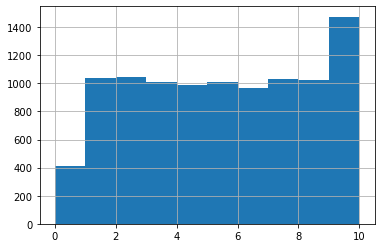

In [10]:
df['tenure'].hist()

In [11]:
df[df['tenure'].isna()].head(20)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_crcard,isactive_member,estimated_salary,exited


In [12]:
df['tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: tenure, dtype: int64

In [13]:
df['tenure'].isna().sum()

0

По столбцу tenure наблюдается 909 пропусков. Интересно, что в случае, если данные клиенты являются новыми, по ним не отразилось значение 0 в указанном столбце. Предположим, что система обновляет базу данных на определенной регулярной основе - например, по состоянию на 01.01 очередного года. Вместе с тем, требуется дополнительное возаимодействие с представителями банка в целях изучения причины пропусков по данному столбцу. 

Предлагаю заполнить пропуски в графе "tenure" нулями.

In [14]:
df['tenure'].fillna(0, inplace=True)

Изучим 3 отдельные взаимосвязи в датасете.

1. Рассмотрим долю ушедших из банка клиентов по отношению к общему количеству клиентов

<a id='pie'></a>

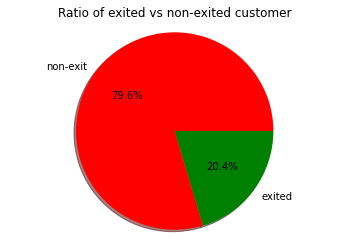

In [15]:
non_exit = len(df[df['exited']==0])
exit = len(df[df['exited']==1])

fig1, ax1 = plt.subplots()
plt.title('Ratio of exited vs non-exited customer')
ax1.pie([non_exit, exit], labels=['non-exit', 'exited'],
       colors=['r', 'g'], autopct='%1.1f%%',
       shadow=True)
ax1.axis('equal')
plt.show()

Из представленного графика следует, что из банка ушла четверть клиентов.

2. Согласно данным в датасете "Бета-Банк" работает в трех странах - Франции, Испании и Германии. Рассмотрим ситуацию с уходом клиентов в этих странах.

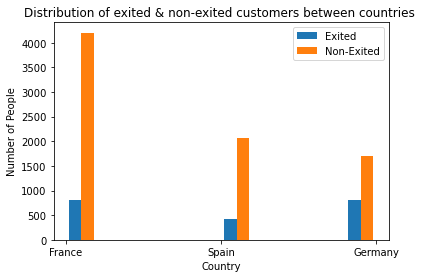

In [16]:
exited_yes= df[df['exited'] == 1]['geography']
exited_no = df[df['exited'] == 0]['geography']

plt.hist([exited_yes,exited_no],label=("Exited","Non-Exited"))
plt.xlabel("Country")
plt.ylabel("Number of People")
plt.title('Distribution of exited & non-exited customers between countries ')
plt.legend();

Лидирует по количеству клиентов Франция (5014 клиентов), в Германии обслуживается 2509 человек, в Испании - 2477. Вместе с тем, лидирующую позицию как по абсолютному значению оттока клиентов (814 клиентов), так и по относительному (32 процента ушедших от общего количества клиентов) занимает Германия, за ней следует Франция (810 ушедших клиентов или 16 процентов от общего количества). В Испании ушло 413 клиентов или 16 процентов от общего количества.

3. Рассмотрим, меняется ли факт ухода клиента из банка исходя из количества лет обслуживания.

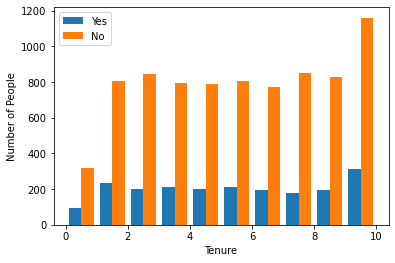

In [17]:
tenure_yes = df[df.exited ==1].tenure
tenure_no = df[df.exited ==0].tenure

plt.hist([tenure_yes, tenure_no], label = ("Yes", "No"))
plt.xlabel("Tenure")
plt.ylabel("Number of People")
plt.legend();

Исходя из представленного графика представляется отсутствие тесных корреляций между тем, сколько лет клиенты обслуживаются в Бета-Банке, и фактом их ухода. Распределение относительно равномерное во взаимосвязи с общим количеством клиентов. Это странно - уходят даже лояльные клиенты и уходят стабильно после 5-6 летнего сотрудничества с банком.

Подготовим выборки для операций ML.

In [18]:
features = df.drop('exited', axis = 1) # это признаки
target = df['exited'] #это целевой признак

In [19]:
features = pd.get_dummies (features, drop_first=True) #получаем дамми-признаки через OHE
features.shape

(10000, 11)

Разбиваем данные на обучающую (60%), валидационную (20%) и тестовую (20%) выборки.

In [20]:
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size = 0.4, random_state = 12345)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_test, target_valid_test, test_size = 0.5, random_state = 123456)

In [21]:
print('Размеры выборок с признаками')
print(f'Обучающая {features_train.shape}\nТестовая {features_test.shape} \nВалидационная {features_valid.shape}')

Размеры выборок с признаками
Обучающая (6000, 11)
Тестовая (2000, 11) 
Валидационная (2000, 11)


In [22]:
print('Размеры выборок с целевым признаком')
print(f'Обучающая {target_train.shape}\nТестовая {target_test.shape}\nВалидационная {target_valid.shape}')

Размеры выборок с целевым признаком
Обучающая (6000,)
Тестовая (2000,)
Валидационная (2000,)


Масштабируем признаки.

In [23]:
numeric = ['credit_score', 'age', 'tenure','balance', 'num_of_products','has_crcard', 'isactive_member', 'estimated_salary'] 

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

**Вывод**

Данные обработаны, наименования столбцов приведены в соответствие, из датасета удалены столбцы, не влияющие на прогноз. Пропуски в графе tenure заполнены нулями. Представлено несколько графиков с исследованиями отдельных показателей датасета и взаимосвязей между ними. Сформированы обучающая, тестовая и валидационная выборки для последующих операций ML, к значениям датасета применены механизмы One-Hot-Encoding и Scaler. 

## Исследование задачи

In [24]:
f1 = 0
best_depth = 0

for depth in range(5,30):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth) #модель дерева решений
    model.fit(features_train, target_train) # обучаем модель
    predicted_valid = model.predict(features_valid) # прогнозирование на валидационной выборке 
    if f1_score(target_valid, predicted_valid) > f1: 
        f1 = f1_score(target_valid, predicted_valid) #расчет f1_score
        best_depth = depth

print(f1)
print(best_depth)

0.5738396624472574
6


In [25]:
model = LogisticRegression(random_state = 123, solver='lbfgs') # модель логистической регрессии 
model.fit(features_train, target_train)  # обучение 
predicted_valid = model.predict(features_valid) # прогнозирование на валидационной выборке 

print(f1_score(target_valid, predicted_valid))

0.3152866242038217


In [26]:
# модель случайного леса
f1 = 0
best_depth = 0  #глубина дерева
best_est = 0   #число деревьев 
random_forest_model = None

for est in range (30,100,4):
    for depth in range (5, 15):
        model = RandomForestClassifier(random_state = 12345, n_estimators = est, 
                                       max_depth = depth)  
        model.fit(features_train, target_train)   # обучение
        predicted_valid = model.predict(features_valid)  # предсказание на валидационной выборке 
        
        if f1_score(target_valid, predicted_valid) > f1:
            f1 = f1_score(target_valid, predicted_valid)   
            best_model_random_forest = model
            best_est = est
            best_depth = depth
            random_forest_model = model
            
print('F1 score =', f1)
print('Число деревьев: ', best_est)
print('Глубина дерева: ', best_depth)

F1 score = 0.5678321678321679
Число деревьев:  42
Глубина дерева:  14


В наших моделях получены сравнительно низкие значения f1 score: для дерева решения его значение составило 0,57, для логистической регрессии - 0,31, для модели случайного леса - 0,56.

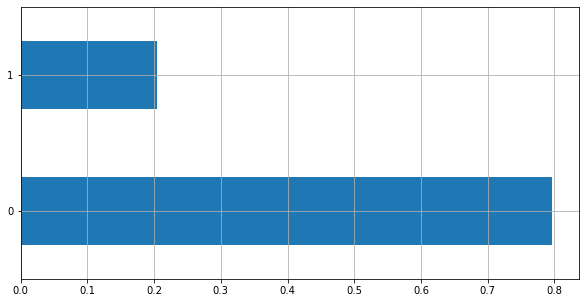

In [27]:
target.value_counts(normalize = True).plot(kind = 'barh', figsize = (10,5), grid = True);

**Вывод**

Построены модели дерева решений, логистической регрессии и случайного леса, произведен расчет f1 score для них, результаты которого показали низкое качество прогноза целевого признака. Кроме того, модель плохо работает по единицам (в выборке их количество составляет около 0.2 от общего количества показателей).

## Борьба с дисбалансом

 ### Взвешивание классов


Для борьбы с дисбалансом выберем метод взвешивания классов, при котором больший вес будет у редкого класса.

Применим метод к модели логистической регрессии.

In [28]:
model = LogisticRegression(random_state = 12345, solver='lbfgs', class_weight = 'balanced', max_iter = 7600)
model.fit(features_train, target_train) #обучение
predicted_valid = model.predict(features_valid) #прогнозирование 

print(f1_score(target_valid, predicted_valid))

0.5028294260307196


 f1 score для модели логистической регрессии после использования class weight вырос с 0,31 до 0,50.

Применим метод к модели дерева решений.

In [29]:
f1 = 0
best_depth = 0

for depth in range(1,30):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth, class_weight = 'balanced')
    model.fit(features_train, target_train) 
    predicted_valid = model.predict(features_valid)
    if f1_score(target_valid, predicted_valid) > f1:
        f1 = f1_score(target_valid, predicted_valid)
        best_depth = depth

print(f1)
print(best_depth)

0.6104023552502453
5


f1 score для модели дерева решений после использования class weight вырос с 0,57 до 0,61.

Применим метод к модели случайного леса.

In [30]:
#Случайный лес
f1 = 0
best_depth = 0  #глубина дерева
best_est = 0   #число деревьев 
random_forest_model = None

for est in range (10,60):
    for depth in range (5, 15):
        model = RandomForestClassifier(random_state = 12345, n_estimators = est, 
                                       max_depth = depth, class_weight = 'balanced')  
        model.fit(features_train, target_train)   # обучение
        predicted_valid = model.predict(features_valid)  # предсказание на валидационной выборке 
        
        if f1_score(target_valid, predicted_valid) > f1:
            f1 = f1_score(target_valid, predicted_valid)   
            best_model_random_forest = model
            best_est = est
            best_depth = depth
            random_forest_model = model

                
                
print('F1-score =', f1)
print('Число деревьев: ', best_est)
print('Глубина дерева: ', best_depth)

F1-score = 0.6352941176470588
Число деревьев:  41
Глубина дерева:  7


 f1 score для модели случайного леса после использования class weight вырос с 0,56 до 0,63.

###  Увеличение выборки

Применим технику upsample, при которой придание баланса классам происходит путем увеличения числа.

Функция upsample():

In [31]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state = 12345)
    
    return features_upsampled, target_upsampled

In [32]:
features_upsampled, target_upsampled = upsample(
    features_train, target_train, 5)

In [33]:
print('размер целевого признака после увеличения :', features_upsampled.shape )
print('размер признаков после увеличения :',target_upsampled.shape)

размер целевого признака после увеличения : (10784, 11)
размер признаков после увеличения : (10784,)


Применим к upsampled features и target модель случайного леса:

In [34]:
#Случайный лес
f1 = 0
best_depth = 0  #глубина дерева
best_est = 0   #число деревьев 
random_forest_model = None

for est in range (20,40):
    for depth in range (5, 15):
        model = RandomForestClassifier(random_state = 12345, n_estimators = est, 
                                       max_depth = depth, class_weight = 'balanced')
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        
        if f1_score(target_valid, predicted_valid) > f1:
            f1 = f1_score(target_valid, predicted_valid)   
            best_model_random_forest = model
            best_est = est
            best_depth = depth
            random_forest_model = model
                
print('F1 мера =', f1)
print('Число деревьев: ', best_est)
print('Глубина дерева: ', best_depth)

F1 мера = 0.6399235912129894
Число деревьев:  31
Глубина дерева:  8


 f1 score для модели случайного леса после использования upsample вырос с 0,56 до 0,63.

**Вывод**

Наблюдается увеличение f1 score после применения к моделям машинного обучения методов борьбы с дисбалансом - функции upsample и метода взвешивания классов.

## Тестирование модели

In [35]:
test_predictions = random_forest_model.predict(features_test)

print(f1_score(target_test, test_predictions))

0.6036916395222583


f1 score для выбранной модели на тестовой выборке составляет 0,5995.

Применим функцию predict_proba, построим ROC-кривую. 

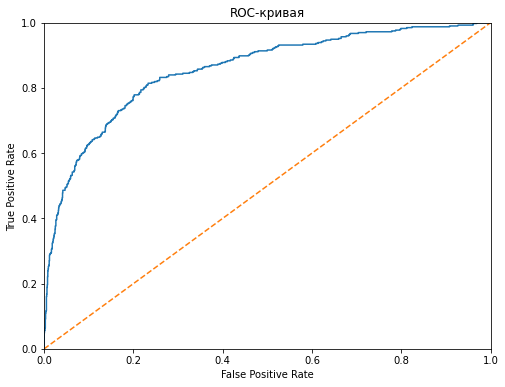

In [36]:
test_predictions = random_forest_model.predict_proba(features_test)
test_predictions = test_predictions[:,1]
fpr, tpr, thresholds = roc_curve(target_test, test_predictions)

plt.figure(figsize = (8,6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()

In [37]:
roc_auc_score(target_test, test_predictions)

0.8560488384944367

**Вывод**

В настоящем проекте проведена работа с обработкой датасета, исследованы основные показатели и базовые взаимосвязи. Построены различные модели ML, к ним применены различные механизмы борьбы с дисбалансом, благодаря чем достигнут показатель f1 score = 0.5995.
AUC-ROC score выбранной модели составил 0,8474, что существенно выше значения AUC-ROC случайной модели 0.5.